## Applying SVM and ANN on features extracted from audio data.

In [2]:
from scipy.io.wavfile import read, write
import os 
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

from makeData import DataObj
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns

Using TensorFlow backend.


## Loading respective data

In [54]:
trainFilename = 'data/featuresALL_train.npy'
testFilename = 'data/featuresALL_test.npy'

In [161]:
# 58 - 20 MFCC 
trainFilename = 'data/features_MFCC60_train.npy'
testFilename = 'data/features_MFCC60_test.npy'

In [126]:
# 56.4 - 13 MFCC
trainFilename = 'data/features_MFCC13_train.npy'
testFilename = 'data/features_MFCC13_test.npy'

In [152]:
# 53 - Only STD
trainFilename = 'data/features_MFCCstd_train.npy'
testFilename = 'data/features_MFCCstd_test.npy'

In [57]:
# 58 - 20 MFCC (Mean, Median, STD, Variance)
trainFilename = 'data/features_MFCC80_train.npy'
testFilename = 'data/features_MFCC80_test.npy'

In [289]:
#  - 20 CHROMA (Mean, Median, STD, Variance)
trainFilename = 'data/features_CS80_train.npy'
testFilename = 'data/features_CS80_test.npy'

In [296]:
trainFilename = 'data/features_trial_train.npy'
testFilename = 'data/features_trial_test.npy'

In [60]:
# Interquartile ranges
trainFilename = 'data/features_points_train.npy'
testFilename = 'data/features_points_test.npy'

In [61]:
# Load test and train data.

npd = np.load(trainFilename, allow_pickle = True).tolist()
data = pd.DataFrame(data = npd)
df_train = data.drop(data.columns[0],axis=1)

npd = np.load(testFilename, allow_pickle = True).tolist()
data = pd.DataFrame(data = npd)
df_test = data.drop(data.columns[0],axis=1)

In [62]:
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,192,193,194,195,196,197,198,199,200,201
0,-167.437119,-238.574432,-126.343849,-124.796478,-234.000931,-107.423332,-162.608017,74.096825,126.577599,63.288799,...,3.300056,-0.303118,1.729979,-2.755277,6.354795,1.842050,6.293834,9.110073,4.555037,0.0
1,-147.774109,-88.961845,-85.649384,-104.611900,-142.870651,-61.913879,-107.307800,68.096893,80.956772,40.478386,...,-4.821095,-3.957762,-5.641335,-8.346310,-1.077627,-4.851550,5.796757,7.268683,3.634341,0.0
2,13.139436,19.355289,21.645414,24.150234,4.420493,32.498196,12.863420,32.892666,28.077702,14.038851,...,3.672354,5.790708,4.232451,1.324225,7.317870,4.324838,5.135619,5.993645,2.996822,0.0
3,-66.906242,-64.781296,-70.365768,-51.715645,-93.260780,-40.644390,-65.273972,40.407001,52.616390,26.308195,...,7.063162,3.798586,3.656489,1.461886,11.454339,7.007339,8.522797,9.992453,4.996226,0.0
4,-186.470123,1.572429,27.623165,28.667042,-59.972816,31.462238,-32.443249,92.005150,91.435059,45.717529,...,0.596425,4.793941,3.463135,-4.290791,5.605345,0.715275,6.776683,9.896135,4.948068,0.0


In [63]:
#Preprocessing

genreList = df_train.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df_train.iloc[:, :-1], dtype = float))

X_predict = scaler.fit_transform(np.array(df_test, dtype = float))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
#ANN Model

resFile = 'ANN'
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

classifier = model.fit(X_train, y_train, epochs=100, batch_size=128)
result = model.predict_classes(X_predict)
y_pred = model.predict_classes(X_test)

scores = cross_val_score(model, X, y, cv = 5)

Epoch 1/100
1680/1680 [==============================] - 0s 78us/step - loss: 1.8592 - accuracy: 0.2071
Epoch 2/100
1680/1680 [==============================] - 0s 23us/step - loss: 1.7495 - accuracy: 0.2881
Epoch 3/100
1680/1680 [==============================] - 0s 23us/step - loss: 1.6807 - accuracy: 0.3417
Epoch 4/100
1680/1680 [==============================] - 0s 23us/step - loss: 1.6265 - accuracy: 0.3839
Epoch 5/100
1680/1680 [==============================] - 0s 27us/step - loss: 1.5782 - accuracy: 0.4149
Epoch 6/100
1680/1680 [==============================] - 0s 24us/step - loss: 1.5327 - accuracy: 0.4423
Epoch 7/100
1680/1680 [==============================] - 0s 23us/step - loss: 1.4906 - accuracy: 0.4667
Epoch 8/100
1680/1680 [==============================] - 0s 25us/step - loss: 1.4537 - accuracy: 0.4768
Epoch 9/100
1680/1680 [==============================] - 0s 23us/step - loss: 1.4231 - accuracy: 0.4946
Epoch 10/100
1680/1680 [==============================] - 0s 24u

1680/1680 [==============================] - 0s 30us/step - loss: 0.8206 - accuracy: 0.7274
Epoch 80/100
1680/1680 [==============================] - 0s 33us/step - loss: 0.8140 - accuracy: 0.7292
Epoch 81/100
1680/1680 [==============================] - 0s 31us/step - loss: 0.8086 - accuracy: 0.7315
Epoch 82/100
1680/1680 [==============================] - 0s 33us/step - loss: 0.8024 - accuracy: 0.7304
Epoch 83/100
1680/1680 [==============================] - 0s 31us/step - loss: 0.7955 - accuracy: 0.7345
Epoch 84/100
1680/1680 [==============================] - 0s 30us/step - loss: 0.7898 - accuracy: 0.7440
Epoch 85/100
1680/1680 [==============================] - 0s 32us/step - loss: 0.7848 - accuracy: 0.7435
Epoch 86/100
1680/1680 [==============================] - 0s 29us/step - loss: 0.7789 - accuracy: 0.7470
Epoch 87/100
1680/1680 [==============================] - 0s 26us/step - loss: 0.7711 - accuracy: 0.7446
Epoch 88/100
1680/1680 [==============================] - 0s 26us/st

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000001552B928388> does not.

In [42]:
# SVM Model
clf = svm.SVC(decision_function_shape='auto')
#clf.fit(X, y)
clf.fit(X_train, y_train)
result = clf.predict(X_predict)
y_pred = clf.predict(X_test)
resFile = 'SVM'

scores = cross_val_score(clf, X, y, cv = 5)

In [31]:
# RFC Model
RFC = GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=0)
RFC.fit(X_train, y_train)
result = RFC.predict(X_predict)
y_pred = RFC.predict(X_test)
resFile = 'RFC'

scores = cross_val_score(RFC, X, y, cv = 5)

In [116]:
clf = GaussianNB()
#clf.fit(X, y)
clf.fit(X_train, y_train)
result = clf.predict(X_predict)
y_pred = clf.predict(X_test)
resFile = 'NB'

scores = cross_val_score(clf, X, y, cv = 5)

In [43]:
reg = LinearRegression()
#reg.fit(X, y)
reg.fit(X_train, y_train)
result = reg.predict(X_predict)
result = np.round(result)
y_pred = reg.predict(X_test)
y_pred = np.round(y_pred)
resFile = 'LR'

In [44]:
# Predict and Write to file
df = pd.read_csv('data/test_idx.csv')
i = 0
final = []
for index, row in df.iterrows():
    row1 = [row[0], result[i]]
    #print(row1)
    final.append(row1)
    i += 1
df2 = pd.DataFrame(data = final, columns = ['id', 'genre'])

filename = 'data/fin_' + resFile + '.csv'
df2.to_csv(filename, index = False)
print('DONE.')

DONE.


## Confusion Matrix and Classification Report

ALGORITHM:  ANN 

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       121
           1       0.32      0.30      0.31       121
           2       0.56      0.61      0.58       114
           3       0.51      0.49      0.50       110
           4       0.53      0.42      0.47       141
           5       0.52      0.66      0.58       113

    accuracy                           0.52       720
   macro avg       0.52      0.52      0.52       720
weighted avg       0.52      0.52      0.51       720

Accuracy:  0.5180555555555556

Cross-Validated scores:  [0.39791667 0.52708333 0.57083333 0.54791667 0.58333333]

Accuracy: 0.53 (+/- 0.13)


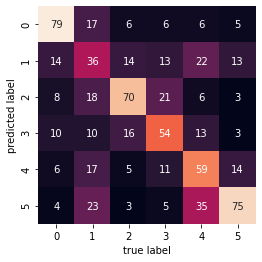

In [67]:
# Confussion Matrix and Classification Report
print('ALGORITHM: ', resFile, '\n')
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

print('\nCross-Validated scores: ', scores)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))